In [247]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [183]:
test=pd.read_csv("https://raw.githubusercontent.com/karndeepsingh/MACHINE-LEARNING-PROJECTS/master/BIG%20MART%20ITEM%20SALE%20DATASET/Test.csv")
train=pd.read_csv("https://raw.githubusercontent.com/karndeepsingh/MACHINE-LEARNING-PROJECTS/master/BIG%20MART%20ITEM%20SALE%20DATASET/Train.csv")

In [184]:
copy_train=train.copy(deep=True)
copy_test=test.copy(deep=True)

In [185]:
train=copy_train.copy(deep=True)

In [186]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [188]:
# Does any column have missing values ?

train.isnull().sum()/len(train) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

Yes , two columns Outlet_Weight and Outlet_Size , can we drop those ? No , we can't as missing values percentage is less 

Now , how we are going to fill the missing data in Outlet_Weight ?

As these are numeric , we can use mean of the entire column or mean of the specific item group ( dairy , soft drinks ..),We are considering the second one

In [189]:
train.groupby('Item_Type')['Item_Weight'].mean()

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [190]:
weights={ item : val.mean() for item , val in train.groupby('Item_Type')['Item_Weight']}

In [191]:
for key,value in weights.items():
    weights[key]=round(value,3)

In [192]:
def missing_values(cols):
    item_type=cols[0]
    weight=cols[1]
    if pd.isnull(weight):
        return weights[item_type]
    
    return weight

In [193]:
train['Item_Weight']=train[["Item_Type","Item_Weight"]].apply(missing_values,axis=1)

In [194]:
train['Item_Weight'].isnull().sum()

0

Now , let's deal with Outlet_Size 

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

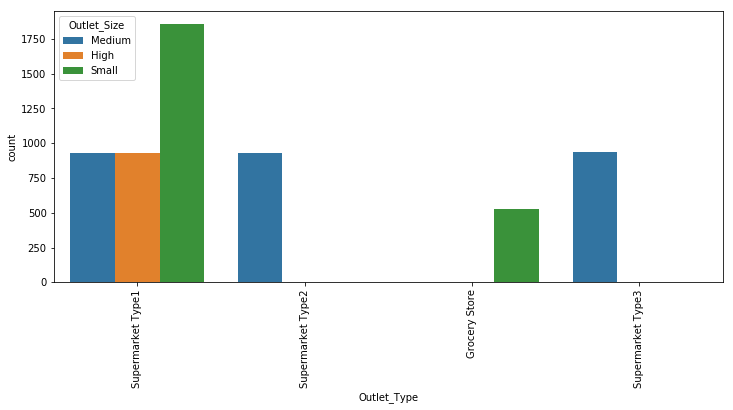

In [195]:
plt.figure(figsize=(12,5))
sns.countplot(data=train,x = "Outlet_Type",hue = "Outlet_Size")
plt.xticks(rotation =90)

Here we can fill missing values by training another model ( KNN, Decision Trees ,.. ) but we dont have much data to train , so we are going with simple approach  

If you are intrested to know how to train another model to predict missing values , check out my repository link : 

In [196]:
# Function for Imputing Missing value in Outlet_Size column:

def impute_size(cols):
    size = cols[0]
    ot_type = cols[1]
    if pd.isnull(size):
        if ot_type == "Supermarket Type1":
            return "Small"
        elif ot_type == "Supermarket Type2":
            return "Medium"
        elif ot_type == "Grocery Store":
            return "Small"
        elif ot_type == "Supermarket Type3":
            return "Medium"
    return size

In [197]:
#USING ABOVE DEFINED FUNCTION IMPUTE MISSING VALUES IN OUTLET SIZE COLUMNS
train["Outlet_Size"] = train[["Outlet_Size","Outlet_Type"]].apply(impute_size, axis = 1)

In [198]:

train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [199]:
train["Item_Fat_Content"] = train["Item_Fat_Content"].str.replace("LF", "low fat").str.replace("reg", "regular").str.lower()

In [200]:
train["Item_Fat_Content"].unique()

array(['low fat', 'regular'], dtype=object)

In [201]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


While exploring the "item_visibility" column, We Found many items visibility as 0.0 which is impossible. Hence, imputing these 0.0 values with MEAN of respective item of visibility

In [204]:
mean_visibility = train.pivot_table(index = "Item_Identifier",  values = "Item_Visibility")


In [205]:
mean_visibility

,Item_Visibility
Item_Identifier,
DRA12,0.031956
DRA24,0.048062
DRA59,0.134718
DRB01,0.082126
DRB13,0.008002
DRB24,0.020624
DRB25,0.077305
DRB48,0.023700
DRC01,0.019219


In [210]:

train.loc[(train["Item_Visibility"] == 0.0), "Item_Visibility"] = train.loc[(train["Item_Visibility"] == 0.0), "Item_Identifier"].apply(lambda x : mean_visibility.at[x, "Item_Visibility"])

In [211]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

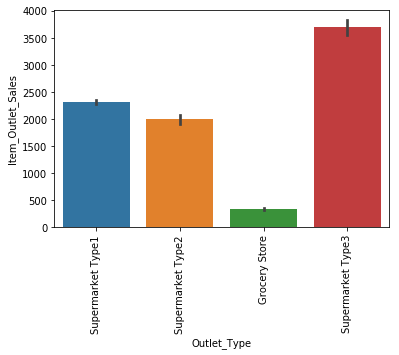

In [214]:
# Let's understand how item sales related with outlet type

sns.barplot(data=train,x="Outlet_Type",y="Item_Outlet_Sales")
plt.xticks(rotation=90)

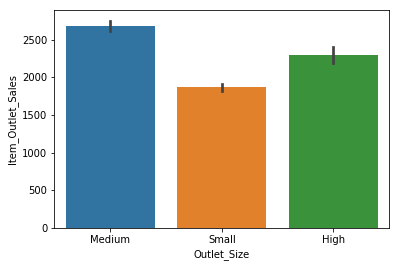

In [215]:
# Let's understand how Outlet Size related with Outlet sales

sns.barplot(data=train,x="Outlet_Size",y="Item_Outlet_Sales")

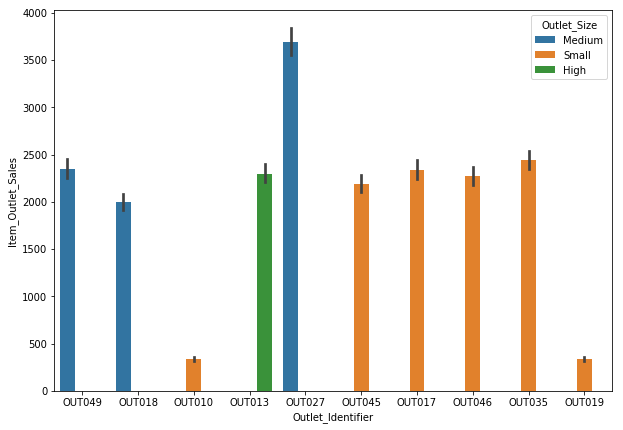

In [218]:
# Let's understand how Outlet Identifier related with Outlet sales
plt.figure(figsize=(10,7))
sns.barplot(data=train,x="Outlet_Identifier",y="Item_Outlet_Sales",hue="Outlet_Size")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

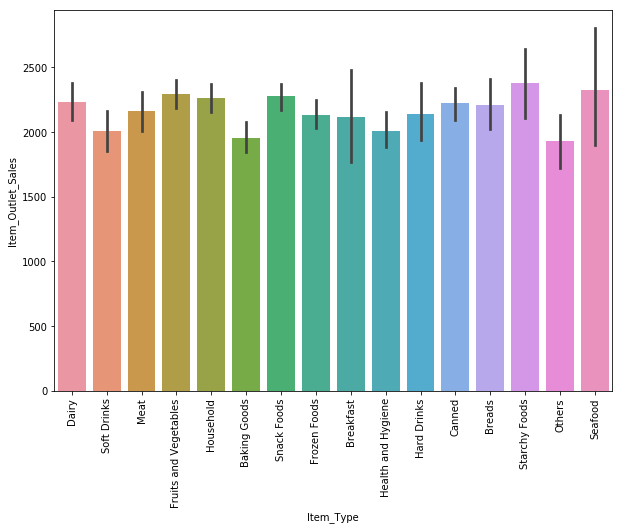

In [221]:
# Let's understand how Outlet Identifier related with Outlet sales
plt.figure(figsize=(10,7))
sns.barplot(data=train,x="Item_Type",y="Item_Outlet_Sales")
plt.xticks(rotation=90)

# Replacing The Categorical Values Containing Columns With Their Respective Frequency or Count

In [225]:
cols = ['Item_Identifier', 'Item_Fat_Content',
       'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']

In [226]:
#MAPPING EACH CATEGORICAL COLUMN WITH RESPECTIVE FREQUENCY OF THE VALUES IN THE COLUMNS
for i in cols:
    x  = train[i].value_counts().to_dict()
    train[i] = train[i].map(x)

In [227]:
#RESULTING DATASET AFTER CATEGORICAL VALUES CONVERTED TO NUMERICAL COLUMN
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,8,9.30,5517,0.016047,682,249.8092,930,930,2793,2388,5577,3735.1380
1,6,5.92,3006,0.019278,445,48.2692,928,928,2793,3350,928,443.4228
2,7,17.50,5517,0.016760,425,141.6180,930,930,2793,2388,5577,2097.2700
3,6,19.20,3006,0.015274,1232,182.0950,555,555,4798,3350,1083,732.3800
4,6,8.93,5517,0.008082,910,53.8614,932,932,932,3350,5577,994.7052


In [228]:
new_data=train.copy(deep=True)

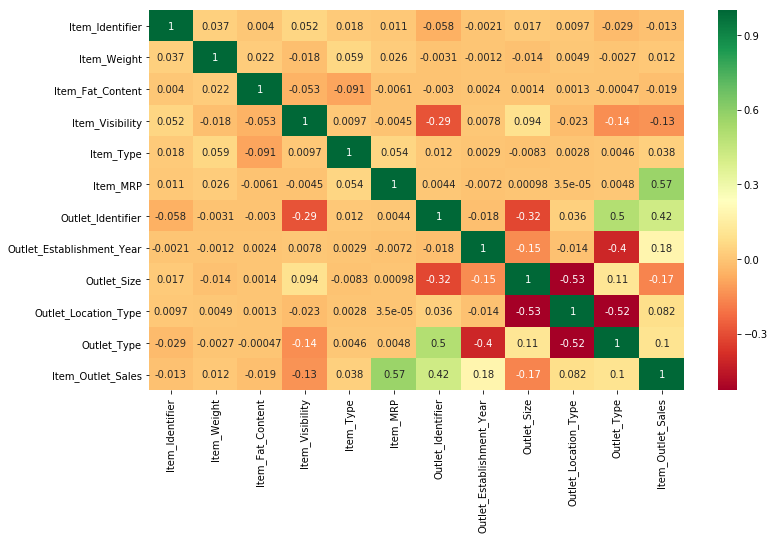

In [230]:
# Let's plot the correlation matrix and see which are less correlated with output

plt.figure(figsize=(12,7))

sns.heatmap(data=new_data.corr(),annot=True,cmap="RdYlGn")



In [232]:
# If we can see the Item_Outlet_Sales column , we can see there some columns are not corelated to the output , so drop it

In [234]:
drop_cols=["Item_Identifier","Item_Weight","Item_Fat_Content","Item_Type","Outlet_Location_Type"]

In [235]:
new_data.drop(drop_cols,axis=1,inplace=True)

In [237]:
# Let's see how our data looks like 

new_data.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,0.016047,249.8092,930,930,2793,5577,3735.1380
1,0.019278,48.2692,928,928,2793,928,443.4228
2,0.016760,141.6180,930,930,2793,5577,2097.2700
3,0.015274,182.0950,555,555,4798,1083,732.3800
4,0.008082,53.8614,932,932,932,5577,994.7052


In [238]:
# Calculating the skewness of the data 

new_data.skew()

Item_Visibility              1.233294
Item_MRP                     0.127202
Outlet_Identifier           -2.244651
Outlet_Establishment_Year    0.936439
Outlet_Size                 -0.803018
Outlet_Type                 -0.650418
Item_Outlet_Sales            1.177531
dtype: float64

# VISUALIZING THE SKEWNESSS OF THE DATASET

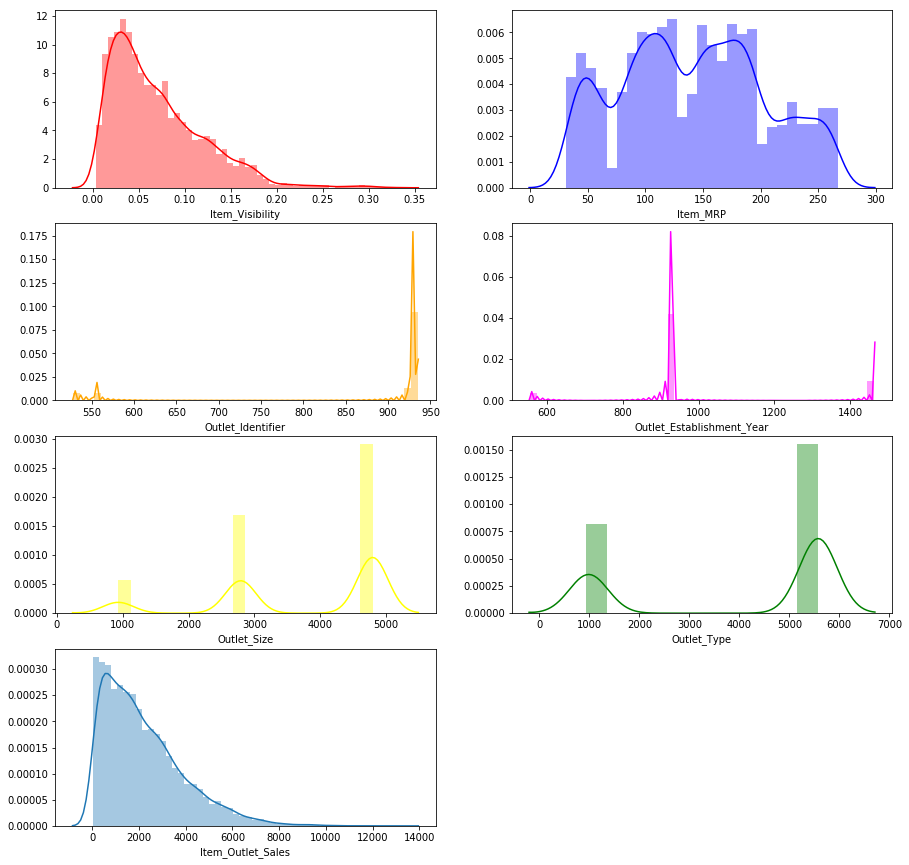

In [251]:
#plt.figure(figsize = (15,15)
fig,ax=plt.subplots(4,2,figsize = (15,15))
fig.delaxes(ax[3][1]) # TO delete the extra one
sns.distplot(new_data["Item_Visibility"],kde=True,ax=ax[0,0],color="red")
sns.distplot(new_data["Item_MRP"],kde=True,ax=ax[0,1],color="blue")
sns.distplot(new_data["Outlet_Identifier"],kde=True,ax=ax[1,0],color="orange")
sns.distplot(new_data["Outlet_Establishment_Year"],kde=True,ax=ax[1,1],color="magenta")
sns.distplot(new_data["Outlet_Size"],kde=True,ax=ax[2,0],color="yellow")
sns.distplot(new_data["Outlet_Type"],kde=True,ax=ax[2,1],color="green")
sns.distplot(new_data["Item_Outlet_Sales"],kde=True,ax=ax[3,0])

In [252]:
new_data.columns

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

From the above plot it is clear that many columns are not following the normal distribution and not properly scaled. Therefore, we will apply "Logarithmic" Transformation on above dataset to make it scale and reduce the skewness

In [253]:
for i in new_data.columns:
    new_data[i] =np.log(new_data[i])

In [254]:
new_data.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,-4.132215,5.520697,6.835185,6.835185,7.934872,8.626406,8.225540
1,-3.948780,3.876794,6.833032,6.833032,7.934872,6.833032,6.094524
2,-4.088756,4.953133,6.835185,6.835185,7.934872,8.626406,7.648392
3,-4.181625,5.204529,6.318968,6.318968,8.475954,6.987490,6.596300
4,-4.818097,3.986414,6.837333,6.837333,6.837333,8.626406,6.902446


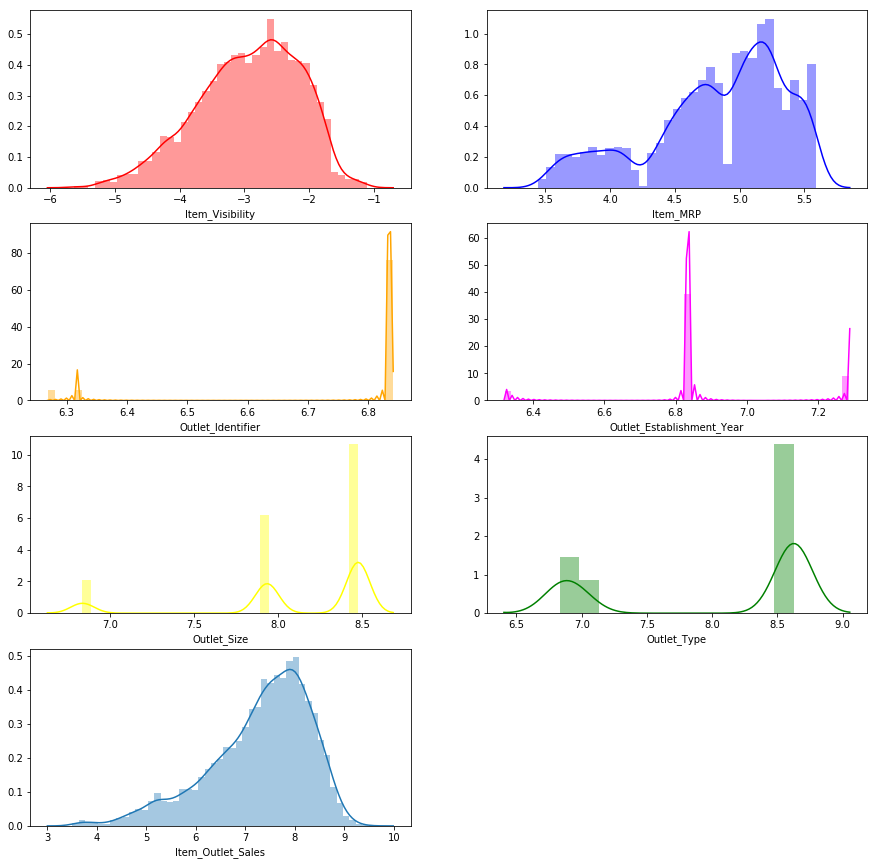

In [255]:
# After Transformation
fig,ax=plt.subplots(4,2,figsize = (15,15))
fig.delaxes(ax[3][1]) # TO delete the extra one
sns.distplot(new_data["Item_Visibility"],kde=True,ax=ax[0,0],color="red")
sns.distplot(new_data["Item_MRP"],kde=True,ax=ax[0,1],color="blue")
sns.distplot(new_data["Outlet_Identifier"],kde=True,ax=ax[1,0],color="orange")
sns.distplot(new_data["Outlet_Establishment_Year"],kde=True,ax=ax[1,1],color="magenta")
sns.distplot(new_data["Outlet_Size"],kde=True,ax=ax[2,0],color="yellow")
sns.distplot(new_data["Outlet_Type"],kde=True,ax=ax[2,1],color="green")
sns.distplot(new_data["Item_Outlet_Sales"],kde=True,ax=ax[3,0])

In [256]:
# Skewness after transformation 

new_data.skew()

Item_Visibility             -0.429840
Item_MRP                    -0.735795
Outlet_Identifier           -2.249965
Outlet_Establishment_Year    0.026025
Outlet_Size                 -1.539875
Outlet_Type                 -0.657515
Item_Outlet_Sales           -0.887753
dtype: float64

# Fitting the Linear Regression Model

In [257]:
# Seperate the input and output 

x=new_data.drop('Item_Outlet_Sales',axis=1)

y=new_data["Item_Outlet_Sales"]

In [259]:
# Splitting the data into train and test 

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)


In [260]:
# Applying the Linear Regression Model 

from sklearn.linear_model import LinearRegression

regressor=LinearRegression()

regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [261]:
# Prediction 

pred=regressor.predict(x_test)

In [262]:
# Accuaray of the model using R2 Score

from sklearn.metrics import mean_squared_error,r2_score

r2_score(y_test,pred)


0.757028146007712

In [263]:
# Root Mean Squared Value 

from math import sqrt 

rmse=sqrt(mean_squared_error(y_test,pred))

rmse


0.519778744716386

#  R2 Score = 75.70%

#  RMSE = 51.97%

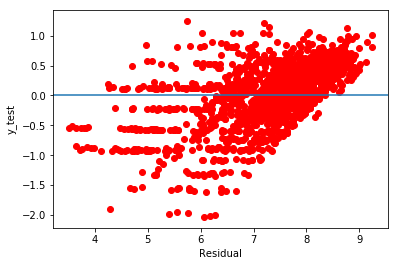

In [270]:
# Let's plot the residual 

residul_lr=y_test - pred


plt.scatter(y_test,residul_lr,color="red")
plt.xlabel("Residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

# Regularization :

## 1. Lasso Regression

In [274]:
# Importing Lasso and Ridge regression from sklearn

from sklearn.linear_model import Lasso,Ridge

# Applying lasso model

laso=Lasso(alpha=0.009)

laso.fit(x_train,y_train)

Lasso(alpha=0.009, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [275]:
# Predict the test data 

laso_pred=laso.predict(x_test)

In [276]:
# Accuaray of the Lasso model using R2 Score

r2_score(y_test,laso_pred)

0.7468491769184082

In [293]:
# Root Mean Squared Value 


laso_rmse=sqrt(mean_squared_error(y_test,laso_pred))

laso_rmse


0.5305547462917749

# After Lasso Regression 


## R2 Score= 74.68%

## RMSE= 53%

In [279]:
laso.coef_

array([-0.        ,  0.98066885,  3.30907722,  0.41566909, -0.        ,
       -0.        ])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

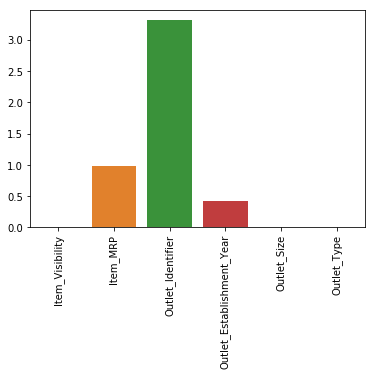

In [282]:
# Visualizing the Lasso Coefficients 

sns.barplot(x=x_train.columns,y=laso.coef_)
plt.xticks(rotation=90)

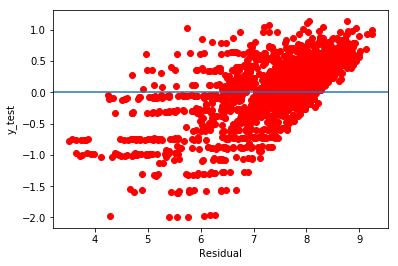

In [285]:
# Residuals 

laso_residual=y_test - laso_pred


plt.scatter(y_test,laso_residual,color="red")
plt.xlabel("Residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

## 2. Ridge Regression:

In [286]:
# Applying Ridge model

rr=Ridge(alpha=0.009)

rr.fit(x_train,y_train)

Ridge(alpha=0.009, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [290]:
# Predict the test data 

rr_pred=rr.predict(x_test)

In [291]:
# Accuaray of the Lasso model using R2 Score

r2_score(y_test,rr_pred)

0.7570259649297463

In [292]:
# Root Mean Squared Value 


rr_rmse=sqrt(mean_squared_error(y_test,rr_pred))

rr_rmse


0.5197810776520827

# After Ridge Regression 


## R2 Score= 75.70%

## RMSE= 51.97%

In [294]:
rr.coef_

array([ 0.0044367 ,  1.01329379,  3.65456049,  0.54683093,  0.03027602,
       -0.02656713])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

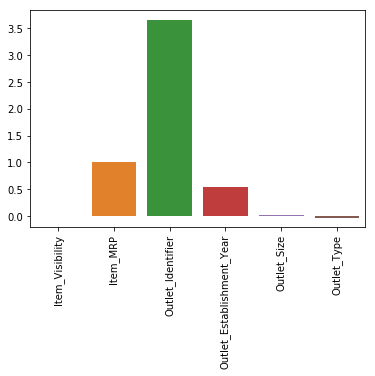

In [295]:
# Visualizing the Ridge Coefficients 

sns.barplot(x=x_train.columns,y=rr.coef_)
plt.xticks(rotation=90)

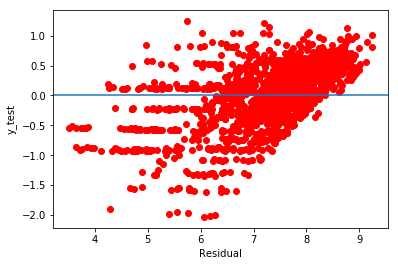

In [296]:
# Residuals 

rr_residual=y_test - rr_pred


plt.scatter(y_test,rr_residual,color="red")
plt.xlabel("Residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

In [316]:
# Let's try out with Polynomial Regression 

In [313]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score 

# We are checking the results for multiple degrees

degrees = [2, 3, 4, 5, 6, 7, 8] # Change degree "hyperparameter" here
normalizes = [True, False] # Change normalize hyperparameter here
scores=[]
best_score = 0
best_degree = 0
for degree in degrees:
    for normalize in normalizes:
        poly_features = PolynomialFeatures(degree = degree)
        X_train_poly = poly_features.fit_transform(x_train)        
        x_test_poly=poly_features.fit_transform(x_test)
        polynomial_regressor = LinearRegression(normalize=normalize)
        polynomial_regressor.fit(X_train_poly, y_train)
        poly_pred=polynomial_regressor.predict(x_test_poly)
        
        diff=y_test - poly_pred
        
        r2_poly=r2_score(y_test,poly_pred)
        
        
        print(f"Degree : {degree} , Normalize : {normalize} , R2_Score = {r2_poly}")
        
        
#scores

Degree : 2 , Normalize : True , R2_Score = 0.7709888987817027
Degree : 2 , Normalize : False , R2_Score = 0.7709888576562631
Degree : 3 , Normalize : True , R2_Score = 0.7695435714865355
Degree : 3 , Normalize : False , R2_Score = 0.7695435698373093
Degree : 4 , Normalize : True , R2_Score = 0.7704183833337431
Degree : 4 , Normalize : False , R2_Score = 0.7704184026584704
Degree : 5 , Normalize : True , R2_Score = 0.7690261426304728
Degree : 5 , Normalize : False , R2_Score = 0.7690261569232627
Degree : 6 , Normalize : True , R2_Score = 0.768366100725528
Degree : 6 , Normalize : False , R2_Score = 0.7683678639385386
Degree : 7 , Normalize : True , R2_Score = 0.7649962079672412
Degree : 7 , Normalize : False , R2_Score = 0.7649544997013189
Degree : 8 , Normalize : True , R2_Score = 0.7575741581661795
Degree : 8 , Normalize : False , R2_Score = 0.7585192990142992


### If we observe the above results , we can clearly say that as we increase the flexibility our accuracy is decreasing 

In [315]:
# We are considering the Degree = 2 

# Let's find out RMSE 

poly_rmse=sqrt(mean_squared_error(y_test,poly_pred))

poly_rmse


0.5181813117902658

## Selcting The Better Model
## 1.From above four different models after applying LASSO, RIDGE and Polynomial  Regression, we can accept the model which is giving the better "RMSE SCORE" and higher accuracy (R2_SCORE).
## 2. Lasso Regression is showing the low accuracy in terms of Linear regression.
## 3. Ridge Regression is showing the similar accuracy in terms of Linear Regression.
## 4. Polynomial Regression is giving us better accuracy than other regression techniques
HENCE, ACCEPTING THE POLYNOMIAL REGRESSION MODEL TO PREDICT THE TEST DATA ITEM OUTLET SALE